In [2]:
import pandas as pd
import glob
import cv2
import pytesseract
from pytesseract import Output

In [67]:
images=glob.glob(r'C:\Users\jaysriva\Documents\Learning\NLP\Tobacco3482-jpg\*\*.jpg')
print('Total Images : ', len(images))

Total Images :  3482


In [70]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\jaysriva\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'
d = {pytesseract.image_to_string(i):i.split('\\')[7] for i in images}
df=pd.DataFrame({'Text_from_Image':list(d.keys()),'target':list(d.values())})
df.shape

(3461, 2)

In [77]:
d

{' \n\n  \n  \n\n \n\nA Mpertant as yan\nsesiye heater abscess. Baely\n\ndoesnt) kiow few te\nBiron Aau-Fotne bl rain systaa Lan\n\nviduiilis etatted. Parenter\nGott, Mast eapennese liste rn siichinng\n\nHeolimars. Costlicr of course\n\n \n\nWainwy > The\n\n \n\n \n\n“Has Determined :\nYourHealth. ae _\n\nSangean Gar\n\n \n\n   \n  \n\n \n\nwest Ty inal\n\n2heg ate LAime went on ay ars\n\n \n\nRE ee a\n\n6P9SP0099\n\n \n\n \n\n \n\x0c': 'ADVE',
 " \n\nTe che fitm\n\nm66400 7127\n\nKOOLS are the only cigarettes that taste\ngood when you have & cold. They taste even\nbetter when you don't.\n\nJob No, K-2978\n‘Mewapapars—300 ines—Mareh & April, 1956\n(8 9-4 in, x 108 ines) Pinel Proof (7) March 15, 1956\n\n \n\x0c": 'ADVE',
 'eee nmr ere eg orem\n\n~~ BW-GR- Ga\n\na k\n\nq\nf\nVending Operators\n\n...Here’s more money for you!\n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\nNow these columns are\n\nWORTH °8 per_machine per year\nto you in Fixed Compensation!\n\nThat\'s right! For big

In [71]:
df.head()

,Text_from_Image,target
0,\n\n \n \n\n \n\nA Mpertant as yan\nsesiye ...,ADVE
1,\n\nTe che fitm\n\nm66400 7127\n\nKOOLS are t...,ADVE
2,eee nmr ere eg orem\n\n~~ BW-GR- Ga\n\na k\n\n...,ADVE
3,"MARCH 24,19 VO — 3 Tersmearep\n\n \n\n‘ yi ill...",ADVE
4,me\n\nSpend a milder moment 1” -\nwith Raleigh...,ADVE


<AxesSubplot:>

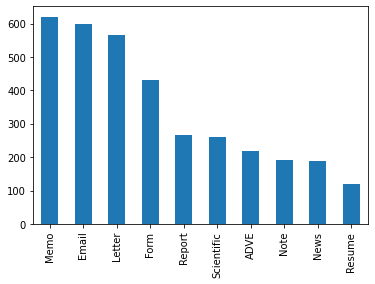

In [72]:
df.target.value_counts().plot(kind='bar')

In [73]:
df.to_csv('Tobacco3482.csv',index=False)

In [3]:
df=pd.read_csv('Tobacco3482.csv')
df

,Text_from_Image,target
0,\n\n \n \n\n \n\nA Mpertant as yan\nsesiye ...,ADVE
1,\n\nTe che fitm\n\nm66400 7127\n\nKOOLS are t...,ADVE
2,eee nmr ere eg orem\n\n~~ BW-GR- Ga\n\na k\n\n...,ADVE
3,"MARCH 24,19 VO — 3 Tersmearep\n\n \n\n‘ yi ill...",ADVE
4,me\n\nSpend a milder moment 1” -\nwith Raleigh...,ADVE
...,...,...
3456,Brochem. J. £1987) 244. 69-74 (Printed m Great...,Scientific
3457,"\n\na VIROLOGY 184, 117-130 (1991}\n\nrite co...",Scientific
3458,O22 ITT AT 1 194 U9gRA02 HO oO\n\nTHE Jew ewan...,Scientific
3459,"ia\n\n \n\n- 1990 ANAL REPOR]\n\n- _, Carcinog...",Scientific


In [4]:
import string
from gensim.models import Word2Vec
import logging
from nltk.corpus import stopwords
from textblob import Word
import pandas as pd

#displaying the list of stopwords
def text_cleaning(df_temp):
    stop = stopwords.words('english')
    df_temp = df_temp.apply(lambda x:' '.join(x.lower() for x in x.split()))
    df_temp= df_temp.apply(lambda x: ' '.join(x for x in x.split() if x not in string.punctuation))
    df_temp= df_temp.str.replace('[^\w\s]','')
    df_temp= df_temp.apply(lambda x: ' '.join(x for x in x.split() if  not x.isdigit()))
    df_temp = df_temp.apply(lambda x:' '.join(x for x in x.split() if not x in stop))
    df_temp = df_temp.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
    return df_temp
df['clean_Text_from_Image']=text_cleaning(df['Text_from_Image'])

C:\Users\jaysriva\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [5]:
df.head()

,Text_from_Image,target,clean_Text_from_Image
0,\n\n \n \n\n \n\nA Mpertant as yan\nsesiye ...,ADVE,mpertant yan sesiye heater abscess baely doesn...
1,\n\nTe che fitm\n\nm66400 7127\n\nKOOLS are t...,ADVE,te che fitm m66400 kools cigarette taste good ...
2,eee nmr ere eg orem\n\n~~ BW-GR- Ga\n\na k\n\n...,ADVE,eee nmr ere eg orem bwgr ga k q f vending oper...
3,"MARCH 24,19 VO — 3 Tersmearep\n\n \n\n‘ yi ill...",ADVE,march vo tersmearep yi ill meili im ta fou rot...
4,me\n\nSpend a milder moment 1” -\nwith Raleigh...,ADVE,spend milder moment raleigh special treatment ...


In [6]:
from gensim.models.phrases import Phrases, Phraser
def sent_word_freq(df_temp):
    sent=[row.split() for row in df_temp]
    phrases = Phrases(sent, min_count=30, progress_per=10000)
    bigram = Phraser(phrases)
    sentences = bigram[sent]
    from collections import defaultdict
    word_freq = defaultdict(int)
    for sent in sentences:
        for i in sent:
            word_freq[i] += 1
    return sentences,word_freq
sentences,word_freq=sent_word_freq(df['clean_Text_from_Image'])
print(len(word_freq))

79354


In [7]:
sorted(word_freq, key=word_freq.get, reverse=True)[:10]

['cigarette',
 'j',
 'e',
 'subject',
 'date',
 'research',
 'tobacco',
 'study',
 'smoking',
 'may']